In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

# Load the data to inspect its structure
file_path = 'boston.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


(      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
     black  lstat  medv  
 0  396.90   4.98  24.0  
 1  396.90   9.14  21.6  
 2  392.83   4.03  34.7  
 3  394.63   2.94  33.4  
 4  396.90   5.33  36.2  ,
 None)

In [12]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# penjelasan
- Variasi Data: Ada variasi yang cukup besar dalam beberapa fitur seperti rm (jumlah kamar), tax (pajak properti), dan medv (harga median). Ini menunjukkan bahwa ada perbedaan yang signifikan dalam karakteristik properti di dataset ini.
- Outlier: Perbedaan yang besar antara nilai minimum, kuartil pertama, dan maksimum menunjukkan kemungkinan adanya outlier dalam beberapa fitur. Misalnya, fitur rm memiliki nilai minimum yang sangat rendah, yang mungkin mengindikasikan adanya properti dengan jumlah kamar yang sangat sedikit.
- Distribusi Data: Dengan melihat kuartil pertama, median, dan kuartil ketiga, kita bisa mendapatkan gambaran kasar tentang distribusi data. Misalnya, jika jarak antara kuartil pertama dan median kurang lebih sama dengan jarak antara median dan kuartil ketiga, maka distribusi data cenderung simetris.

In [4]:
# Define the features (X) and target (y)
X = data.drop(columns=['medv'])
y = data['medv']

# Split the data: 70% train, 30% temp (to be split further)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temp set into 50% validation and 50% test (15% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the sizes of the splits
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((354, 13), (76, 13), (76, 13), (354,), (76,), (76,))

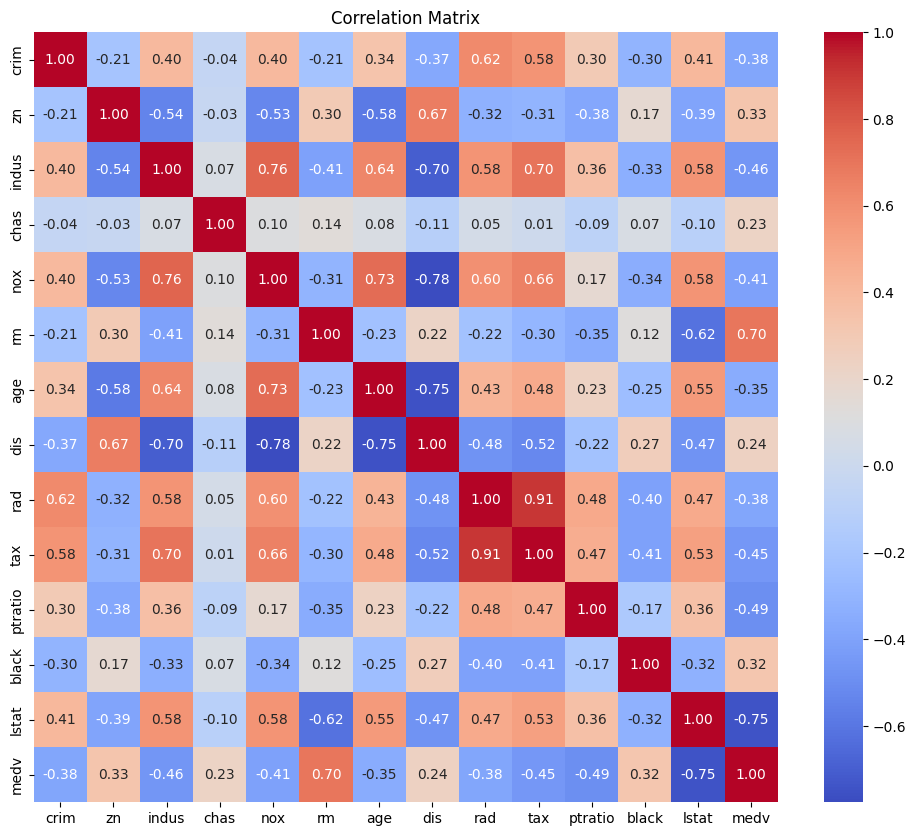

,medv
rm,0.698491
zn,0.329526
black,0.324991
dis,0.241323
chas,0.226487
age,-0.350505
crim,-0.380453
rad,-0.384704
nox,-0.406677
tax,-0.452308


In [6]:
# Compute the correlation matrix for the training data
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()


# Plot the heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Extract correlations with the target variable (medv) and sort them
target_correlation = correlation_matrix['medv'].drop('medv').sort_values(ascending=False)
target_correlation

In [20]:
# prompt: help me create lambdas = [0.01, 0.1, 1, 10]
# Train the ordered regression models (Ridge and LASSO) on the training data with several given lambda values.
# Select the best lambda value from the validation set using RMSE as the metric.

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

lambdas = [0.01, 0.1, 1, 10]
best_lambda = None
best_rmse = float('inf')

for l in lambdas:
    # Ridge Regression
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_val)
    ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_predictions))

    # Lasso Regression
    lasso_model = Lasso(alpha=l)
    lasso_model.fit(X_train, y_train)
    lasso_predictions = lasso_model.predict(X_val)
    lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_predictions))

    print(f"Lambda: {l}")
    print(f"  Ridge RMSE: {ridge_rmse}")
    print(f"  Lasso RMSE: {lasso_rmse}")

    # Determine the best model based on RMSE
    if ridge_rmse < best_rmse:
        best_rmse = ridge_rmse
        best_lambda = l
        best_model_type = "Ridge"
    if lasso_rmse < best_rmse:
        best_rmse = lasso_rmse
        best_lambda = l
        best_model_type = "Lasso"

print(f"\nBest Lambda: {best_lambda} ({best_model_type} Regression)")
print(f"Best RMSE: {best_rmse}")

Lambda: 0.01
  Ridge RMSE: 4.013384278111799
  Lasso RMSE: 4.049457573712948
Lambda: 0.1
  Ridge RMSE: 4.025099976086045
  Lasso RMSE: 4.267571039254151
Lambda: 1
  Ridge RMSE: 4.106727277363532
  Lasso RMSE: 4.872471134867044
Lambda: 10
  Ridge RMSE: 4.250284252866108
  Lasso RMSE: 5.980177856873224

Best Lambda: 0.01 (Ridge Regression)
Best RMSE: 4.013384278111799


# Penjelasan
Best Model: Ridge Regression with λ=0.01
Best RMSE: 4.013384278111799.

*** Nilai Koefisien ***
Untuk Regresi Ridge, koefisien menyusut tetapi tidak disetel ke nol. Koefisien-koefisien ini memberi tahu kita kekuatan dan arah hubungan antara setiap fitur dan target (`medv`)
Sebagai contoh:
     - Sebuah **koefisien positif** (misalnya, untuk `rm`) menunjukkan bahwa meningkatkan nilai fitur akan meningkatkan `medv`.
     - Koefisien **negatif** (misalnya, untuk `kejahatan`) menunjukkan bahwa meningkatkan nilai fitur akan menurunkan `medv`.

*** Pentingnya Fitur ***
Nilai absolut koefisien yang lebih besar menunjukkan lebih banyak pengaruh pada variabel target
Koefisien yang lebih kecil menunjukkan bahwa fitur yang bersangkutan memiliki dampak yang lebih lemah.

*** Multikolinearitas ***
Ridge membantu menangani multikolinieritas (korelasi tinggi di antara fitur-fitur) dengan menghukum koefisien yang besar.

In [24]:
# Train the best Ridge model
best_ridge = Ridge(alpha=0.01, random_state=42)
best_ridge.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients = best_ridge.coef_

# Create a DataFrame to organize feature names and their coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients
})

# Sort coefficients by magnitude for better interpretation
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Display coefficients
print(coef_df)

# Interpretation:
# Positive coefficients: Higher feature values increase the target (medv).
# Negative coefficients: Higher feature values decrease the target (medv).
# Small coefficients: Feature has minimal effect on the target.

    Feature  Coefficient
5        rm     2.913922
8       rad     2.093345
11    black     1.023724
3      chas     0.813922
1        zn     0.808230
2     indus     0.342833
6       age    -0.298968
0      crim    -1.108218
9       tax    -1.446323
4       nox    -1.797670
10  ptratio    -2.052208
7       dis    -2.942103
12    lstat    -3.885642


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
y_test_pred = best_ridge.predict(X_test)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print the evaluation metrics
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"RMSE: {rmse}")


MAE: 364.8252639897838
MAPE: 2645.7881709136664%
RMSE: 492.58222471085713


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Berdasarkan nilai-nilai MAE, MAPE, dan RMSE yang Anda berikan, dapat disimpulkan bahwa:

    Model Anda memiliki kesalahan prediksi yang cukup besar. Nilai-nilai MAE, MAPE, dan RMSE yang cukup tinggi menunjukkan bahwa model Anda belum mampu memprediksi nilai dengan sangat akurat.
    Kesalahan prediksi cenderung bervariasi. RMSE yang lebih tinggi dibandingkan MAE menunjukkan bahwa model Anda mungkin membuat beberapa prediksi yang sangat meleset, yang berdampak signifikan pada nilai RMSE.
    
Faktor yang Mungkin Mempengaruhi Hasil:

    Kualitas data: Jika data yang digunakan untuk melatih model tidak bersih, memiliki banyak outlier, atau tidak representatif, maka kinerja model akan terpengaruh.
    Kompleksitas model: Model yang terlalu sederhana mungkin tidak mampu menangkap pola yang kompleks dalam data, sedangkan model yang terlalu kompleks mungkin overfitting dan tidak mampu menggeneralisasi ke data baru.
    Pemilihan fitur: Fitur yang digunakan dalam model harus relevan dengan variabel target. Fitur yang tidak relevan dapat menurunkan kinerja model.
    Hyperparameter tuning: Nilai hyperparameter yang dipilih dapat sangat mempengaruhi kinerja model.